# Compute performance metrics for the given Y and Y_score without sklearn

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [12]:
df=pd.read_csv('5_a.csv')
df.head(1)

,y,proba
0,1.0,0.637387


In [13]:
df.loc[df['proba'] < 0.5, 'pred'] = 0.0
df.loc[df['proba'] > 0.5, 'pred'] = 1.0
df.pred.value_counts()

1.0    10100
Name: pred, dtype: int64

In [14]:
equal=df['pred']==df['y'] 
ones=df['y']==1 
zeros=df['y']==0

not_equal=df['pred']!=df['y'] 


In [15]:
df.loc[equal & ones, 'mat']='TP'
df.loc[equal & zeros, 'mat']='TN'
df.loc[not_equal & ones, 'mat']='FP'
df.loc[not_equal & zeros, 'mat']='FN'

In [16]:
TP=df[df.mat=='TP'].count()[0]
TN=df[df.mat=='TN'].count()[0]
FP=df[df.mat=='FP'].count()[0]
FN=df[df.mat=='FN'].count()[0]

#PRecision and Recall
Re=TP/(FN+TP)
Pr=TP/(TP+FP)
print('Recall is {} and Precision is {}'.format(round(Re,3),Pr))
F_1_Score=2*(Pr*Re/(Pr+Re))
print('The F1 Score is {}'.format(F_1_Score))

Recall is 0.99 and Precision is 1.0
The F1 Score is 0.9950248756218906


In [17]:
def AUCScore():

    # Getting the indices of probability values in descending order. ==> use np.argsort function
    ind=np.argsort(df.proba,axis=1)
    ind=ind[ : : -1] 
    # Arrange actual_values and probability_values as same as indices order.
    
    actual_values = df.y[ind]
    probability_values = df.proba[ind]
   
    tpr=[]
    fpr=[]
    for threshold in probability_values:
        y_predicted = []
        for prob in probability_values:
             # append 0 to y_predicted if prob < threshold otherwise append 1
            if prob < threshold:
                y_predicted.append(0)
            else:
                y_predicted.append(1)
        # Now get tn, fp, fn, tp by using actaul_values and y_predicted
        tn,fp,fn,tp=0,0,0,0
        for i,j in zip(actual_values,y_predicted):
            i=int(i)
            j=int(j)
            if i==j and i==0:
                tn=tn+1 
            if i!=j and i==0:
                fp=fp+1 
            if i!=j and i==1:
                fn=fn+1 
            if i==j and i==1:
                tp=tp+1 



        tpr.append(tp/(tp+fn))
        fpr.append(fp/(fp+tn))
   
    return np.trapz(tpr, fpr),tpr,fpr


a,tpr,fpr=AUCScore()


the accuracy is 0.9900990099009901
auc is :0.48829900000000004


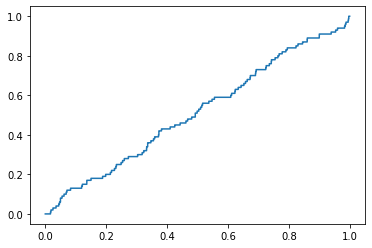

In [18]:
print('the accuracy is {}'.format((TP+TN)/(TP+TN+FP+FN)))
plt.plot(tpr,fpr)
print('auc is :{}'.format(a))

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [22]:
# write your code
df=pd.read_csv('5_b.csv')
df.loc[df['proba'] < 0.5, 'pred'] = 0.0
df.loc[df['proba'] > 0.5, 'pred'] = 1.0
df.pred.value_counts()
equal=df['pred']==df['y'] 
ones=df['y']==1 
zeros=df['y']==0

not_equal=df['pred']!=df['y'] 
df.loc[equal & ones, 'mat']='TP'
df.loc[equal & zeros, 'mat']='TN'
df.loc[not_equal & ones, 'mat']='FP'
df.loc[not_equal & zeros, 'mat']='FN'
TP=df[df.mat=='TP'].count()[0]
TN=df[df.mat=='TN'].count()[0]
FP=df[df.mat=='FP'].count()[0]
FN=df[df.mat=='FN'].count()[0]

#PRecision and Recall
Re=TP/(FN+TP)
Pr=TP/(TP+FP)
print('Recall is {} and Precision is {}'.format(round(Re,3),Pr))
F_1_Score=2*(Pr*Re)/(Pr+Re)
print('The F1 Score is {}'.format(F_1_Score))
#################################################
def AUCScore():

    # Getting the indices of probability values in descending order. ==> use np.argsort function
    ind=np.argsort(df.proba,axis=1)
    ind=ind[ : : -1] 
    # Arrange actual_values and probability_values as same as indices order.

    actual_values = df.y[ind]
    probability_values = df.proba[ind]

    tpr=[]
    fpr=[]
    for threshold in probability_values:
        y_predicted = []
        for prob in probability_values:
             # append 0 to y_predicted if prob < threshold otherwise append 1
            if prob < threshold:
                y_predicted.append(0)
            elif prob>=threshold:
                y_predicted.append(1)
        # Now get tn, fp, fn, tp by using actaul_values and y_predicted
        tn,fp,fn,tp=0,0,0,0
        for i,j in zip(actual_values,y_predicted):
            i=int(i)
            j=int(j)
            #print('i,j is ',i,j)
            if i==j and i==0:
                tn=tn+1 
            if i!=j and i==0:
                fp=fp+1 
            if i!=j and i==1:
                fn=fn+1 
            if i==j and i==1:
                tp=tp+1 



        tpr.append(tp/(tp+fn))
        fpr.append(fp/(fp+tn))

    return np.trapz(tpr, fpr),tpr,fpr

a,tpr,fpr=AUCScore()


Recall is 0.187 and Precision is 0.55
The F1 Score is 0.2791878172588833


the accuracy is 0.9718811881188119
auc is :0.9377570000000001


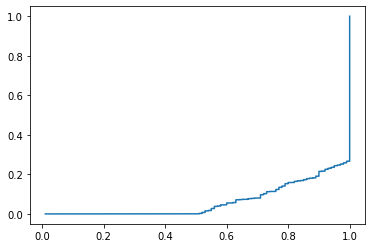

In [23]:
print('the accuracy is {}'.format((TP+TN)/(TP+TN+FP+FN)))
plt.plot(tpr,fpr)
print('auc is :{}'.format(a))

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [27]:
df=pd.read_csv('5_c.csv')


def AUCScore():
    A={}
    tre=[]
    # Getting the indices of probability values in descending order. ==> use np.argsort function
    ind=np.argsort(df.prob,axis=1)
    ind=ind[ : : -1] 
    # Arrange actual_values and probability_values as same as indices order.

    actual_values = df.y[ind]
    probability_values = df.prob[ind]

    tpr=[]
    fpr=[]
    for threshold in probability_values:
        df.loc[df['prob'] < threshold , 'pred'] = 0.0
        df.loc[df['prob'] >= threshold, 'pred'] = 1.0
        y_predicted = []
        for prob in probability_values:
             # append 0 to y_predicted if prob < threshold otherwise append 1
            if prob < threshold:
                y_predicted.append(0)
            elif prob>=threshold:
                y_predicted.append(1)
        # Now get tn, fp, fn, tp by using actaul_values and y_predicted
        tn,fp,fn,tp=0,0,0,0
        for i,j in zip(actual_values,y_predicted):
            i=int(i)
            j=int(j)
            #print('i,j is ',i,j)
            if i==j and i==0:
                tn=tn+1 
            if i!=j and i==0:
                fp=fp+1 
            if i!=j and i==1:
                fn=fn+1 
            if i==j and i==1:
                tp=tp+1 


        
        A[threshold]=500*fn + 100*fp

    return A
A=AUCScore()

In [38]:
m=min(A.values())
main_treshold=[key for key in A if A[key]==m]
print('The threshold with min A of {} is {} '.format(m,main_treshold[0]
                                                    ))

The threshold with min A of 141000 is 0.2300390278970873 


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [186]:
df=pd.read_csv('5_d.csv')
df['abs_err']=abs(df.pred-df.y)
df['sq_err']=(df.pred-df.y)**2
tot_rows=df.shape[0]
MSE=sum(df['sq_err'])/tot_rows
print('The MSE value is : ',MSE)

The MSE value is :  177.16569974554707


In [187]:
df['nume']=df.abs_err/np.mean(df.y)
print('MAPE value is {} %'.format(round(sum(df['nume'])/tot_rows*100,2)))

MAPE value is 12.91 %


In [188]:
df

,y,pred,abs_err,sq_err,nume
0,101.0,100.0,1.0,1.0,0.015024
1,120.0,100.0,20.0,400.0,0.300471
2,131.0,113.0,18.0,324.0,0.270424
3,164.0,125.0,39.0,1521.0,0.585919
4,154.0,152.0,2.0,4.0,0.030047
...,...,...,...,...,...
157195,87.0,83.0,4.0,16.0,0.060094
157196,97.0,86.0,11.0,121.0,0.165259
157197,106.0,93.0,13.0,169.0,0.195306
157198,105.0,101.0,4.0,16.0,0.060094


In [191]:
ss_reg=sum((df.pred-np.mean(df.pred))**2)
ss_total=sum((df.y-np.mean(df.pred))**2)
R2=ss_reg/ss_total
print('The R2 value is :',R2)

The R2 value is : 0.9573353892619763
